In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
DATE = "date"

In [11]:
releases = pd.read_csv("releases.csv", index_col=0)
release = pd.read_csv("releases.csv", index_col=0)
genres = pd.read_csv("genres.csv", index_col=0)

## Write encoded_genres.csv

In [13]:
releases = releases.iloc[:,[1]]
releases['date'] = pd.to_datetime(releases['date'])
releases = releases.groupby('id')[DATE].agg('min')
merge_df = pd.merge(genres, releases, left_index=True, right_index=True, how="left")
merge_df = merge_df.dropna()
filtered_date_df = merge_df[merge_df['date'].dt.year > 1970]
filtered_date_genrecount_df = filtered_date_df[filtered_date_df['genre_count']<=3]
filtered_date_genrecount_df.to_csv("encoded_genres.csv")

## Release Dates Grouped by Decade

In [5]:
decades = [int(datetime.strptime(date, '%Y-%m-%d').strftime('%Y')[0:3] + '0') for date in release["date"]]
decade_count = {decade: decades.count(decade) for decade in set(decades)}

# Extract decade labels and counts
labels = list(decade_count.keys())
counts = list(decade_count.values())

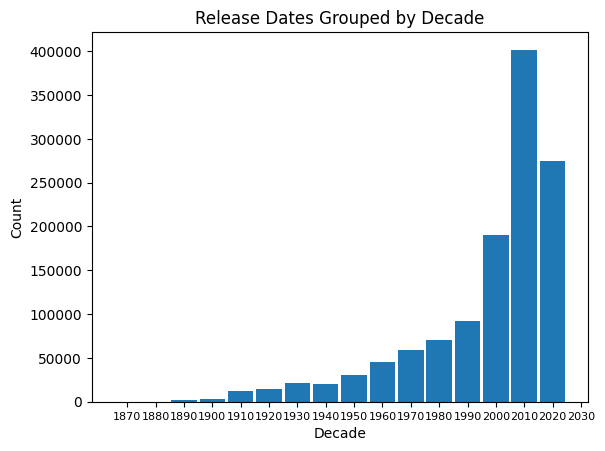

In [6]:
plt.hist(decades, bins=range(min(decades), max(decades) + 10, 10), rwidth=0.9, align='left')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Release Dates Grouped by Decade')
plt.xticks(range(min(decades), max(decades) + 10, 10), fontsize=8)

output_path = 'Release dates grouped by decade.jpg'
plt.savefig(output_path, dpi=300)  

plt.show()